2536


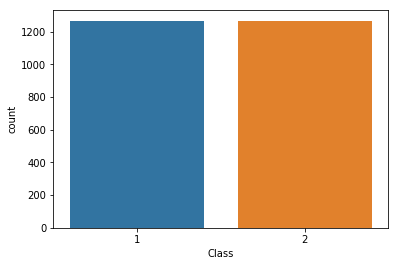

In [35]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#CV
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd()+'/steel_data.csv')

sns.countplot(x="Class", data= df)



df_class1 = df[df.Class==1]
df_class2 = df[df.Class==2]
df_class2_upsampled = sk.utils.resample(df_class2,
                                        replace=True,
                                        n_samples=1268)
df = pd.concat([df_class1, df_class2_upsampled])
print(len(df))
sns.countplot(x="Class", data= df)



X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Class'], test_size=0.49)


#clf.predict([X_test,y_test])

# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()


In [36]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

#clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
#print(y2_predicted,y_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.9798873692679002


In [37]:

clf = LogisticRegression()
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.6065969428801288


/home/shashanks/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.6323411102172164
